In [1]:
import numpy as np
import pandas as pd

import statsmodels.api as sm
import statistics as stat

from statsmodels.formula.api import ols

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import zscore 
from math import sqrt
from sklearn.metrics import mean_squared_error as MSE
from statistics import mean, stdev

from sklearn.linear_model import LinearRegression, Ridge,LassoCV, Lasso, RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge


import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_validate 
from sklearn.model_selection import cross_val_score
from matplotlib.pylab import rcParams

import time
from IPython.display import clear_output

In [18]:
df=pd.read_excel("goode ccfst (including LDI).xlsx")

In [3]:
print(df)

      D (mm)  t (mm)  Le (mm)  fy (MPa)  fc (MPa)  CONFINEMENT EFFECT  \
0      44.45    1.25    700.0     250.0      42.4            0.496538   
1      44.45    1.25    700.0     250.0      51.7            0.440836   
2      44.45    1.60    700.0     250.0      42.4            0.581652   
3      44.45    2.00    700.0     250.0      42.4            0.672841   
4      44.45    1.25    490.0     250.0      42.4            0.496538   
...      ...     ...      ...       ...       ...                 ...   
1197  337.00    6.47   1011.0     823.0      41.1            0.813211   
1198  300.00   12.00   1580.0     479.0      31.5            1.000000   
1199  337.00    6.47   1011.0     823.0      41.1            0.813211   
1200  358.00    5.66    716.0     290.0      73.2            0.272625   
1201  372.00    3.64    744.0     320.0      73.2            0.215263   

      N Test (kN)  
0            45.2  
1            68.6  
2            69.4  
3            82.0  
4            82.0  
...

In [4]:
df.describe()

,D (mm),t (mm),Le (mm),fy (MPa),fc (MPa),CONFINEMENT EFFECT,N Test (kN)
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,143.856362,4.133140,1033.802249,335.764552,50.144281,0.609500,1723.599810
std,63.022947,2.235999,993.536968,90.317678,31.834451,0.246386,1708.660189
min,44.450000,0.520000,152.349200,178.280000,9.169218,0.082997,45.200000
25%,107.925000,2.640000,393.000000,274.586200,29.620000,0.415212,688.400000
50%,122.000000,4.000000,660.000000,325.000000,40.900000,0.589019,1195.650000
75%,168.300000,5.000000,1143.000000,371.000000,58.680000,0.811772,2044.264898
max,450.000000,16.000000,5560.000000,853.000000,193.300000,1.000000,9996.000000


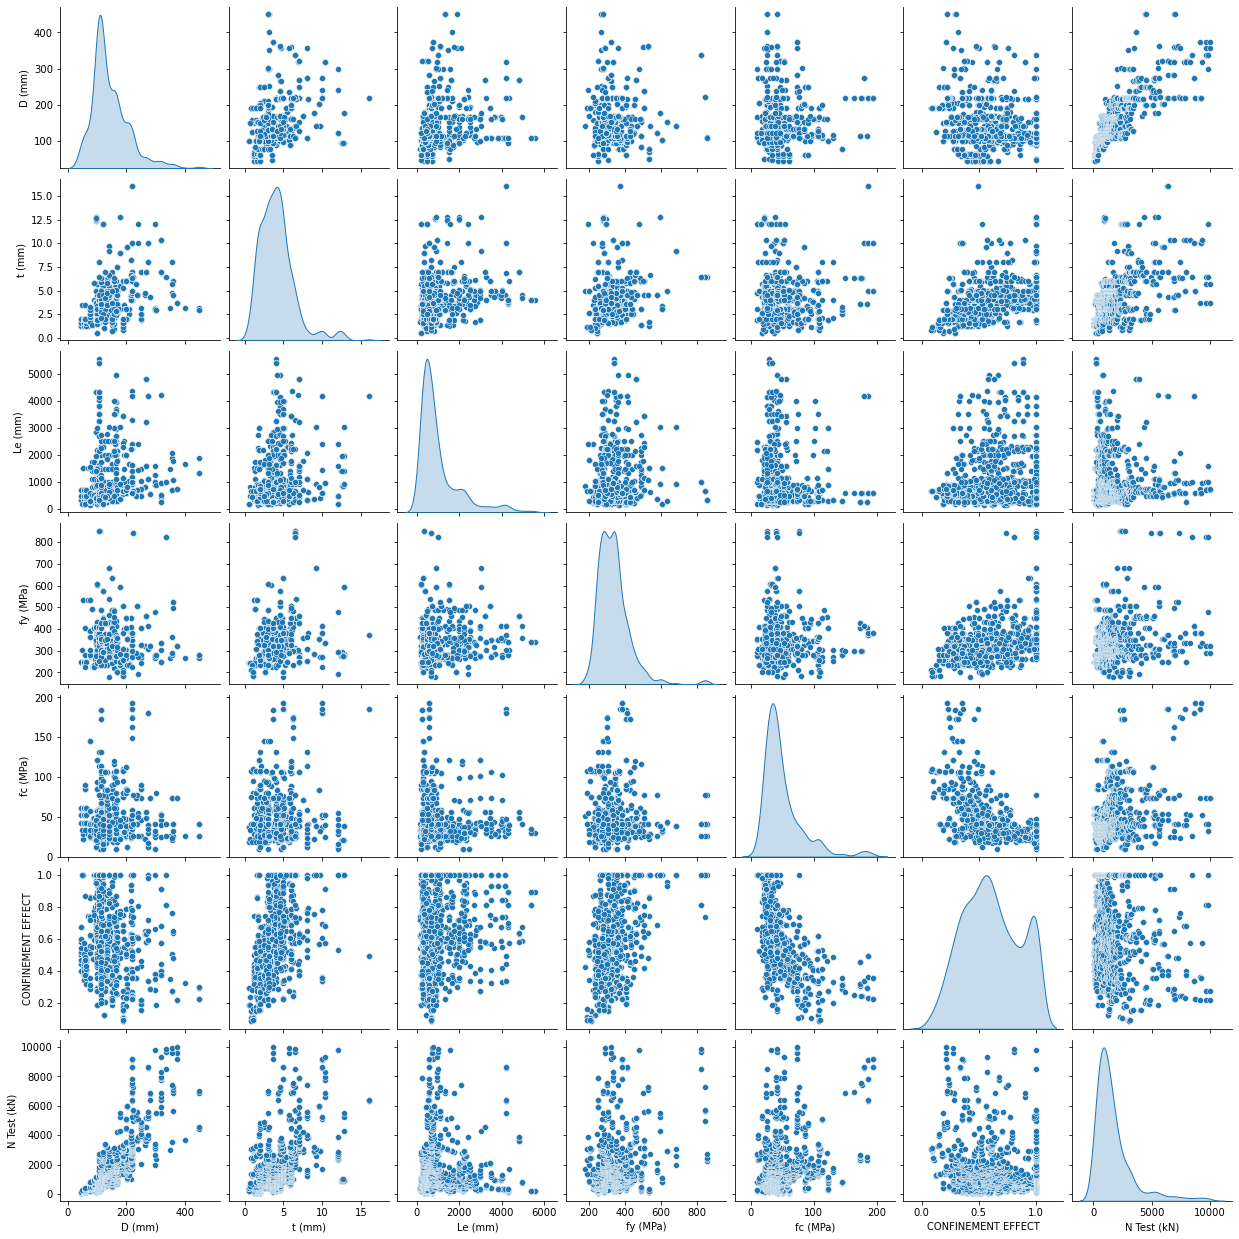

In [3]:
sns.pairplot(df, diag_kind='kde')

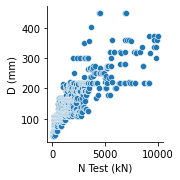

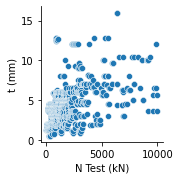

In [11]:
sns.pairplot(df,y_vars=['D (mm)'],x_vars=['N Test (kN)'],diag_kind='kde') 
sns.pairplot(df,y_vars=['t (mm)'],x_vars=['N Test (kN)'],diag_kind='kde')

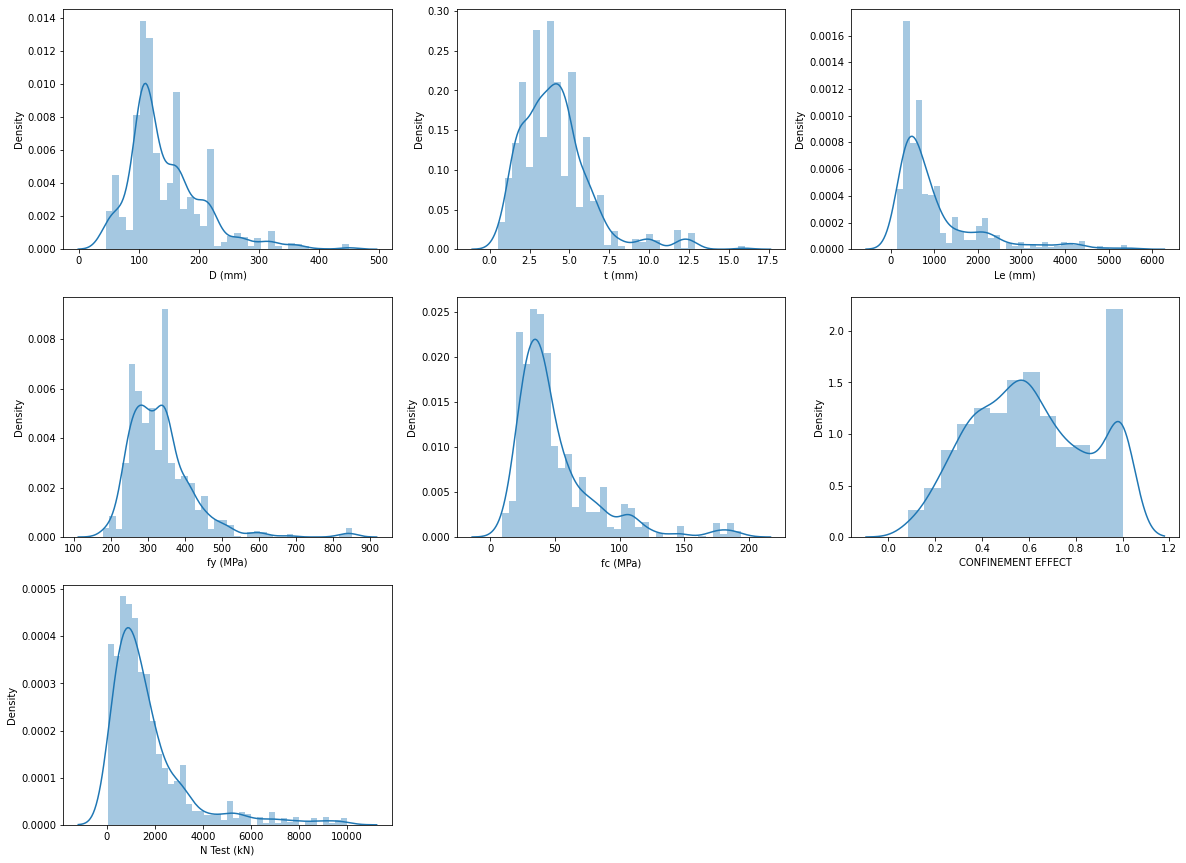

In [30]:
var=np.arange(1,len(df.columns)+1)
var
from IPython.core.pylabtools import figsize
figsize(20, 15)
for i in var:
    plt.subplot(3,3,i)
    sns.distplot(df.iloc[:,(i-1)])

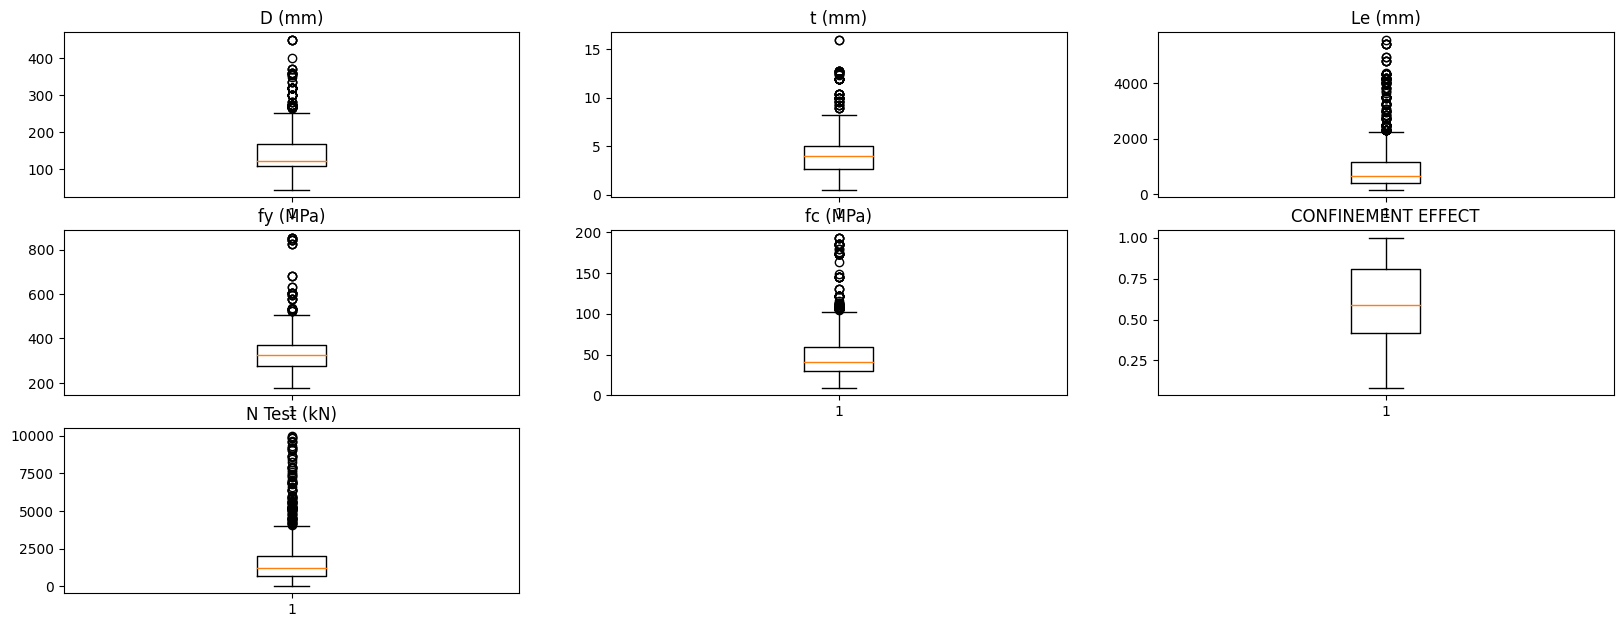

In [7]:
figsize(20, 15)
for i in var:
    plt.subplot(6,3,i)
    plt.boxplot(df.iloc[:,(i-1)])
    plt.title(df.columns[i-1])

In [9]:
df.describe()

,D (mm),t (mm),Le (mm),fy (MPa),fc (MPa),CONFINEMENT EFFECT,N Test (kN)
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,143.856362,4.133140,1033.802249,335.764552,50.144281,0.609500,1723.599810
std,63.022947,2.235999,993.536968,90.317678,31.834451,0.246386,1708.660189
min,44.450000,0.520000,152.349200,178.280000,9.169218,0.082997,45.200000
25%,107.925000,2.640000,393.000000,274.586200,29.620000,0.415212,688.400000
50%,122.000000,4.000000,660.000000,325.000000,40.900000,0.589019,1195.650000
75%,168.300000,5.000000,1143.000000,371.000000,58.680000,0.811772,2044.264898
max,450.000000,16.000000,5560.000000,853.000000,193.300000,1.000000,9996.000000


In [10]:
df.describe().to_excel('description.xls')

In [11]:
display(df)

,D (mm),t (mm),Le (mm),fy (MPa),fc (MPa),CONFINEMENT EFFECT,N Test (kN)
0,44.45,1.25,700.0,250.0,42.4,0.496538,45.2
1,44.45,1.25,700.0,250.0,51.7,0.440836,68.6
2,44.45,1.60,700.0,250.0,42.4,0.581652,69.4
3,44.45,2.00,700.0,250.0,42.4,0.672841,82.0
4,44.45,1.25,490.0,250.0,42.4,0.496538,82.0
...,...,...,...,...,...,...,...
1197,337.00,6.47,1011.0,823.0,41.1,0.813211,9668.0
1198,300.00,12.00,1580.0,479.0,31.5,1.000000,9823.0
1199,337.00,6.47,1011.0,823.0,41.1,0.813211,9835.0
1200,358.00,5.66,716.0,290.0,73.2,0.272625,9947.0


In [12]:
#MIN MAX SCALING

df_min_max_scaled = df.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - 
                                 df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - 
                                                                     df_min_max_scaled[column].min())
display(df_min_max_scaled)

,D (mm),t (mm),Le (mm),fy (MPa),fc (MPa),CONFINEMENT EFFECT,N Test (kN)
0,0.000000,0.047158,0.101273,0.106296,0.180474,0.450970,0.000000
1,0.000000,0.047158,0.101273,0.106296,0.230981,0.390227,0.002352
2,0.000000,0.069767,0.101273,0.106296,0.180474,0.543788,0.002432
3,0.000000,0.095607,0.101273,0.106296,0.180474,0.643230,0.003698
4,0.000000,0.047158,0.062439,0.106296,0.180474,0.450970,0.003698
...,...,...,...,...,...,...,...
1197,0.721366,0.384367,0.158784,0.955537,0.173414,0.796305,0.967038
1198,0.630132,0.741602,0.264006,0.445696,0.121277,1.000000,0.982614
1199,0.721366,0.384367,0.158784,0.955537,0.173414,0.796305,0.983820
1200,0.773148,0.332041,0.104232,0.165580,0.347746,0.206791,0.995076


In [31]:
#ABSOLUTE MAX SCALING

df_max_scaled = df.copy()
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
display(df_max_scaled)

,D (mm),t (mm),Le (mm),fy (MPa),fc (MPa),CONFINEMENT EFFECT,N Test (kN)
0,0.098778,0.078125,0.125899,0.293083,0.219348,0.496538,0.004522
1,0.098778,0.078125,0.125899,0.293083,0.267460,0.440836,0.006863
2,0.098778,0.100000,0.125899,0.293083,0.219348,0.581652,0.006943
3,0.098778,0.125000,0.125899,0.293083,0.219348,0.672841,0.008203
4,0.098778,0.078125,0.088129,0.293083,0.219348,0.496538,0.008203
...,...,...,...,...,...,...,...
1197,0.748889,0.404375,0.181835,0.964830,0.212623,0.813211,0.967187
1198,0.666667,0.750000,0.284173,0.561547,0.162959,1.000000,0.982693
1199,0.748889,0.404375,0.181835,0.964830,0.212623,0.813211,0.983894
1200,0.795556,0.353750,0.128777,0.339977,0.378686,0.272625,0.995098


In [16]:
df_max_scaled.head().to_excel('normalized.xls')

In [32]:
df.corr()

,D (mm),t (mm),Le (mm),fy (MPa),fc (MPa),CONFINEMENT EFFECT,N Test (kN)
D (mm),1.000000,0.338135,0.123183,0.088965,0.038870,-0.234377,0.819101
t (mm),0.338135,1.000000,0.180789,0.241431,-0.010345,0.459548,0.504724
Le (mm),0.123183,0.180789,1.000000,0.087056,-0.149391,0.220985,-0.048856
fy (MPa),0.088965,0.241431,0.087056,1.000000,0.027155,0.392885,0.246336
fc (MPa),0.038870,-0.010345,-0.149391,0.027155,1.000000,-0.601328,0.348084
CONFINEMENT EFFECT,-0.234377,0.459548,0.220985,0.392885,-0.601328,1.000000,-0.198662
N Test (kN),0.819101,0.504724,-0.048856,0.246336,0.348084,-0.198662,1.000000


In [19]:
df.corr().to_excel('correlation matrix.xls')

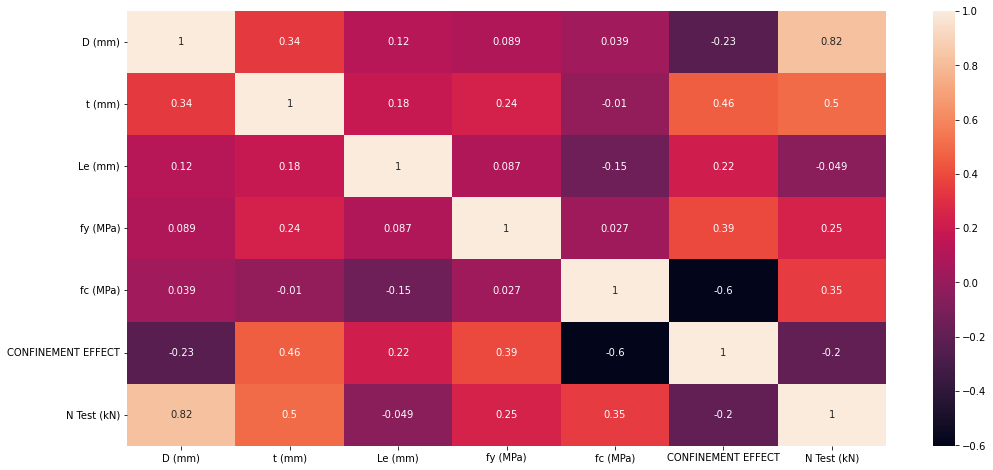

In [20]:
plt.figure(figsize=[17,8])
fig=sns.heatmap(df.corr(),annot=True)

In [33]:
#Store value of target variable in a variable for de-normalization in further process

#absolute max scaling
mx=max(df.iloc[:,-1])

#normalization (mean,std)
me=stat.mean(df.iloc[:,-1])
st=stat.stdev(df.iloc[:,-1])
         
print(mx,me,st)

9996.0 1723.5998101216185 1708.6601893055952


In [36]:
#Normalizing input and output variables
x = df_max_scaled.iloc[:,:-1]         
y = df_max_scaled.iloc[:,-1] 

print(x)
print(y)

        D (mm)    t (mm)   Le (mm)  fy (MPa)  fc (MPa)  CONFINEMENT EFFECT
0     0.098778  0.078125  0.125899  0.293083  0.219348            0.496538
1     0.098778  0.078125  0.125899  0.293083  0.267460            0.440836
2     0.098778  0.100000  0.125899  0.293083  0.219348            0.581652
3     0.098778  0.125000  0.125899  0.293083  0.219348            0.672841
4     0.098778  0.078125  0.088129  0.293083  0.219348            0.496538
...        ...       ...       ...       ...       ...                 ...
1197  0.748889  0.404375  0.181835  0.964830  0.212623            0.813211
1198  0.666667  0.750000  0.284173  0.561547  0.162959            1.000000
1199  0.748889  0.404375  0.181835  0.964830  0.212623            0.813211
1200  0.795556  0.353750  0.128777  0.339977  0.378686            0.272625
1201  0.826667  0.227500  0.133813  0.375147  0.378686            0.215263

[1202 rows x 6 columns]
0       0.004522
1       0.006863
2       0.006943
3       0.008203
4      

In [37]:
#splitting data into test & train data (ABSOLUTE MAX SCALING)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [38]:
print(len(y_train))
print(len(y_test))

961
241


In [40]:
lr = LinearRegression()

ridge = Ridge()

lr.fit(X_train, y_train)
ridge.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge.predict(X_test)

In [41]:
#Test & Train data (ABSOLUTE MAX SCALING)

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinearRegression \t {:.5f} \t{:.5f} \t{:.5f} \t{:.5f}""".format(
            mx*np.sqrt(mean_squared_error(y_test, y_pred_lr)),(mx**2)*mean_squared_error(y_test, y_pred_lr),
            mx*mean_absolute_error(y_test, y_pred_lr), r2_score(y_test, y_pred_lr)))

print("""RidgeRegression \t {:.5f} \t{:.5f} \t{:.5f} \t{:.5f}""".format(
            mx*np.sqrt(mean_squared_error(y_test, y_pred_ridge)),(mx**2)*mean_squared_error(y_test, y_pred_ridge),
            mx*mean_absolute_error(y_test, y_pred_ridge), r2_score(y_test, y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinearRegression 	 561.73975 	315551.54197 	384.72303 	0.86598
RidgeRegression 	 557.93438 	311290.77208 	373.95114 	0.86779


In [42]:
#WEIGHT AND BIAS OF LINEAR REGRESSION
print(lr.coef_)
print(lr.intercept_)

[ 0.94932304  0.25961171 -0.15270427  0.12576231  0.36735889  0.06966093]
-0.3565067167631095


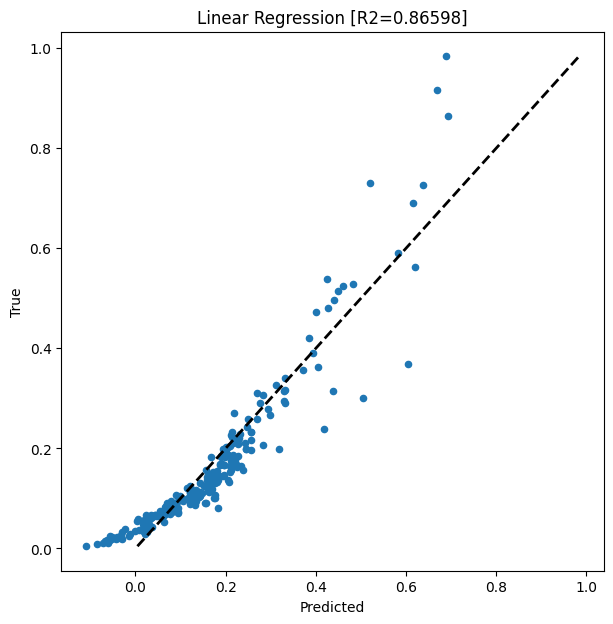

In [28]:
f=plt.figure()
f.set_figwidth(7)
f.set_figheight(7)
plt.scatter(y_pred_lr, y_test, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Linear Regression [R2={:.5f}]".format(r2_score(y_test, y_pred_lr)))
plt.show()

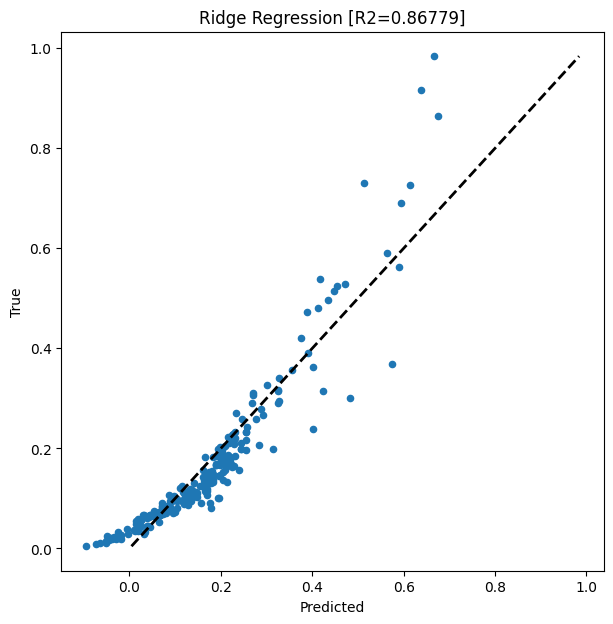

In [29]:
f2=plt.figure()
f2.set_figwidth(7)
f2.set_figheight(7)
plt.scatter(y_pred_ridge, y_test, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel("True")
plt.xlabel("Predicted")
plt.title("Ridge Regression [R2={:.5f}]".format(r2_score(y_test, y_pred_ridge)))
plt.show()

Text(0.5, 1.0, 'Ridge Regression')

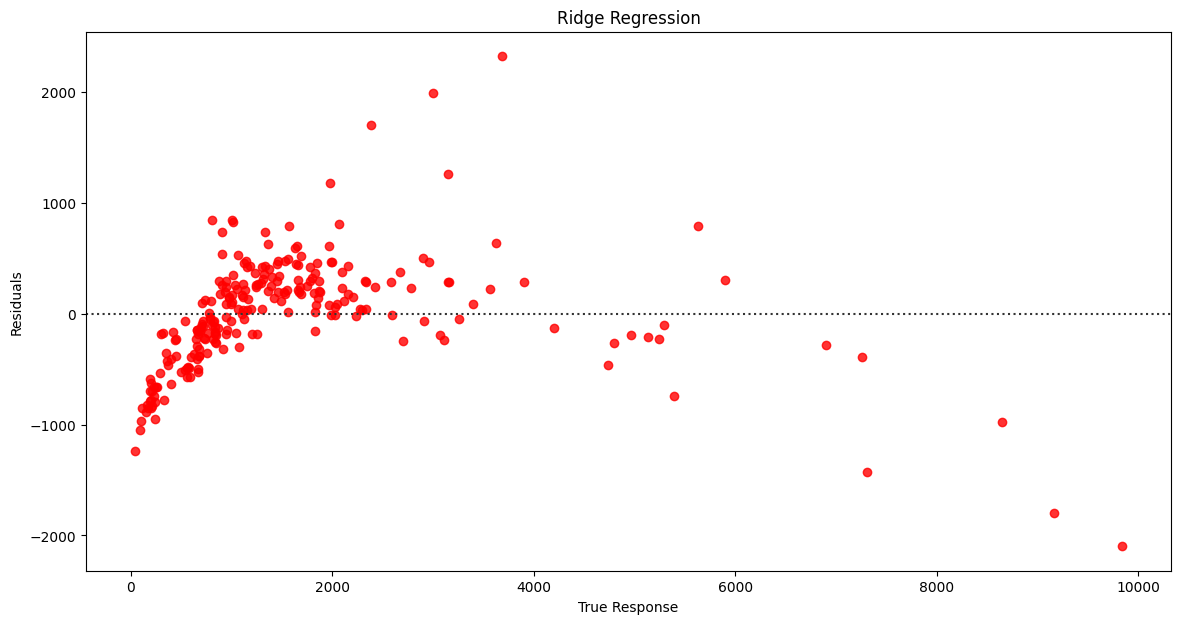

In [30]:
#RESIDUAL PLOTS FOR RIDGE REGRESSION

residual_ridge=(y_pred_ridge-y_test)*mx
fig_ridge=plt.figure()
fig_ridge.set_figwidth(14)
fig_ridge.set_figheight(7)

sns.residplot(x = y_test*mx,y = residual_ridge,color='red')
plt.xlabel("True Response")
plt.ylabel("Residuals")
plt.title("Ridge Regression")

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 270.61362 	 73231.73215 	 127.26720 	 0.96890


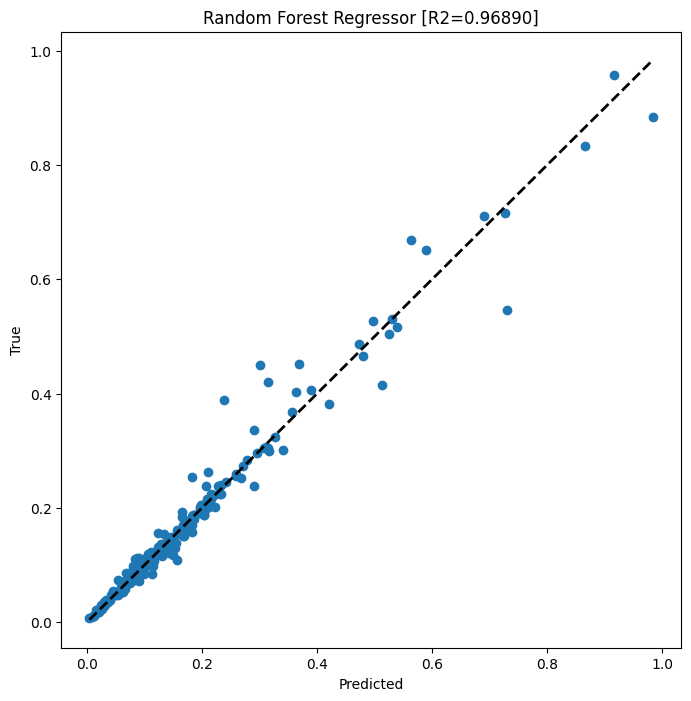

In [31]:
rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

f=plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.5f} \t {:.5f} \t {:.5f} \t {:.5f}""".format(
            mx*np.sqrt(mean_squared_error(y_test, y_pred_rfr)),(mx**2)*mean_squared_error(y_test, y_pred_rfr),
            mx*mean_absolute_error(y_test, y_pred_rfr), r2_score(y_test, y_pred_rfr)))

plt.scatter(y_test, y_pred_rfr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Random Forest Regressor [R2={:.5f}]".format(r2_score(y_test, y_pred_rfr)))
plt.show() 

Text(0.5, 1.0, 'Random Forest Regressor')

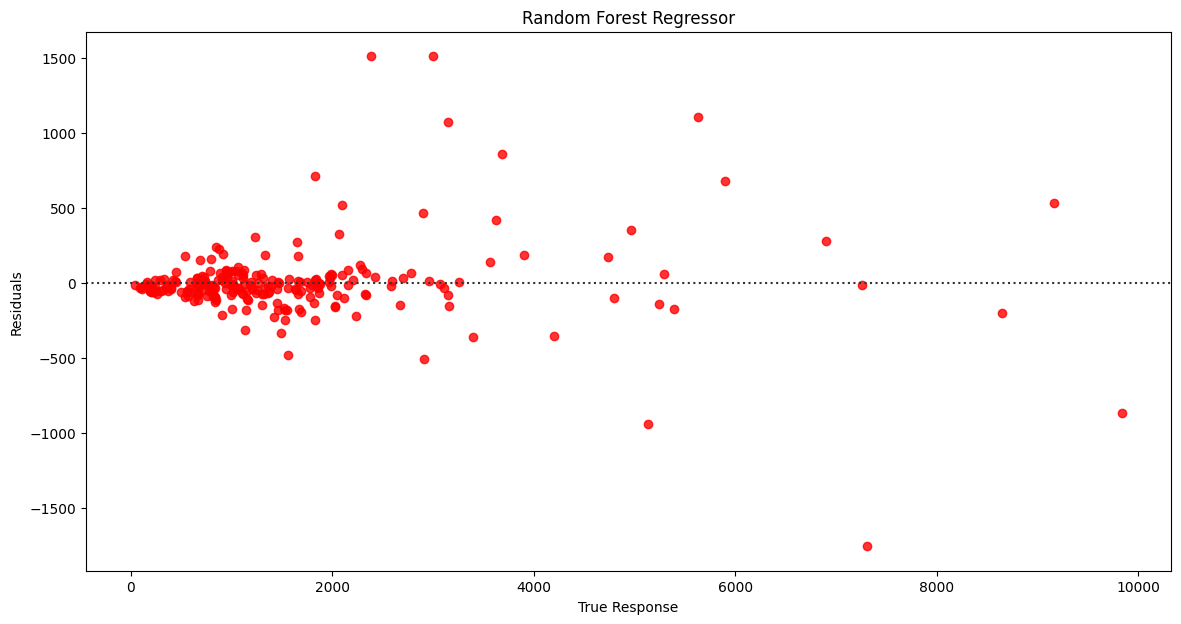

In [32]:
#RESIDUAL PLOTS FOR RANDOM FOREST

residual_rfr=(y_pred_rfr-y_test)*mx
fig_rfr=plt.figure()
fig_rfr.set_figwidth(14)
fig_rfr.set_figheight(7)

sns.residplot(x = y_test*mx,y = residual_rfr,color='red')
plt.xlabel("True Response")
plt.ylabel("Residuals")
plt.title("Random Forest Regressor")

Model				 RMSE 			 MSE 			 MAE 			 R2
Decision Tree Regressor 	 282.04076 		 79546.99156 		126.11400 		0.96621


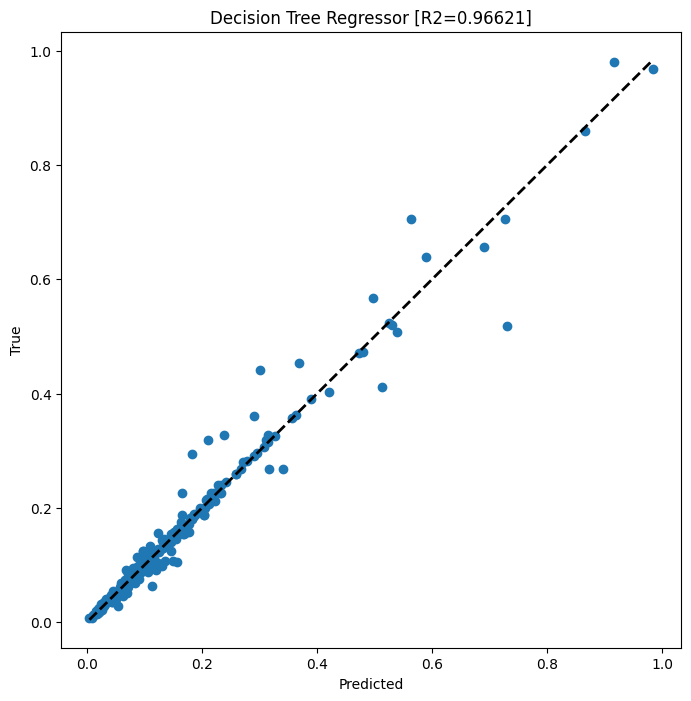

In [33]:
dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t\t MSE \t\t\t MAE \t\t\t R2")
print("""Decision Tree Regressor \t {:.5f} \t\t {:.5f} \t\t{:.5f} \t\t{:.5f}""".format(
            mx*np.sqrt(mean_squared_error(y_test, y_pred_dtr)),(mx**2)*mean_squared_error(y_test, y_pred_dtr),
            mx*mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)))

f=plt.figure()
f.set_figwidth(8)
f.set_figheight(8)

plt.scatter(y_test, y_pred_dtr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Decision Tree Regressor [R2={:.5f}]".format(r2_score(y_test, y_pred_dtr)))
plt.show()

Text(0.5, 1.0, 'Decision Tree Regressor')

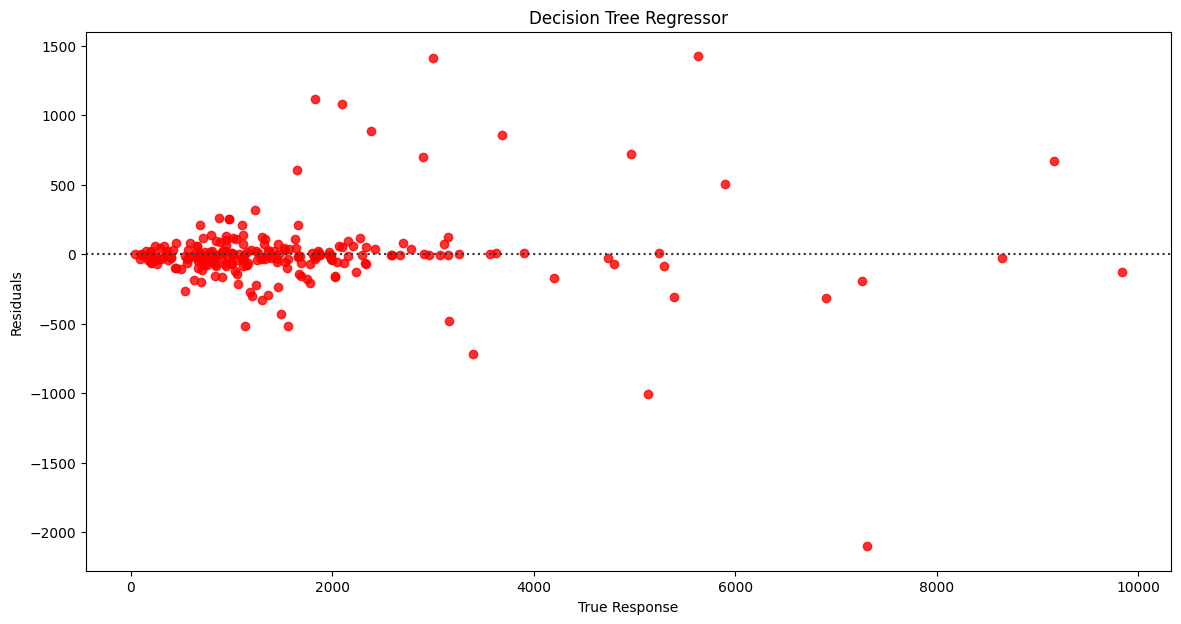

In [34]:
#RESIDUAL PLOTS FOR DECISION TREE

residual_dtr=(y_pred_dtr-y_test)*mx
fig_dtr=plt.figure()
fig_dtr.set_figwidth(14)
fig_dtr.set_figheight(7)

sns.residplot(x = y_test*mx,y = residual_dtr,color='red')
plt.xlabel("True Response")
plt.ylabel("Residuals")
plt.title("Decision Tree Regressor")

In [35]:
from sklearn import tree
from sklearn.tree import export_graphviz
from subprocess import call
import graphviz

estimator = rfr.estimators_[4]
tree.export_graphviz(estimator,out_file='tree.dot',feature_names=['D (mm)','t(mm)','Le (mm)','fy (MPa)',
                                                                 'fc (MPa)','CONFINEMENT EFFECT'],rounded = True, 
                                                                 proportion = False, precision = 2, filled = True)

from graphviz import render
render('dot','pdf','tree.dot')

'tree.dot.pdf'

In [37]:
# From the obtained values from Matlab R2021B file with BR-NN ,for comparison of RMSE and R2 plots with other models
mean_RMSE=223.32
mean_MAE=117.56
mean_R2=0.98530

print("Model\t\t RMSE \t\t\t MSE \t\t\t MAE \t\t\t R2")
print("""Neural network \t {:.5f} \t\t {:.5f} \t\t{:.5f} \t\t{:.5f}""".format(
            mean_RMSE,mean_RMSE**2,mean_MAE,mean_R2))

Model		 RMSE 			 MSE 			 MAE 			 R2
Neural network 	 223.32000 		 49871.82240 		117.56000 		0.98530


In [38]:
#autolabel for labelling in RMSE and R2 plots
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.5f}'.format(height), xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

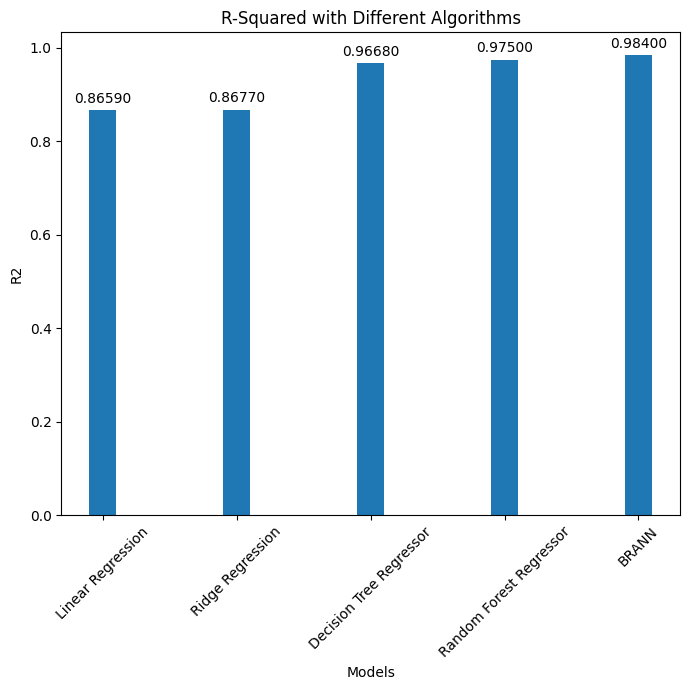

In [41]:
names= ["Linear Regression","Ridge Regression","Decision Tree Regressor","Random Forest Regressor","BRANN"]
x = np.arange(len(names)) 
width = 0.2

j=[0.8659,0.8677,0.9668,0.9750,0.984]
fig, ax = plt.subplots(figsize=(7,7))
rects = ax.bar(x,j,width=0.2)
ax.set_ylabel('R2')
ax.set_xlabel('Models')
ax.set_title('R-Squared with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()
    

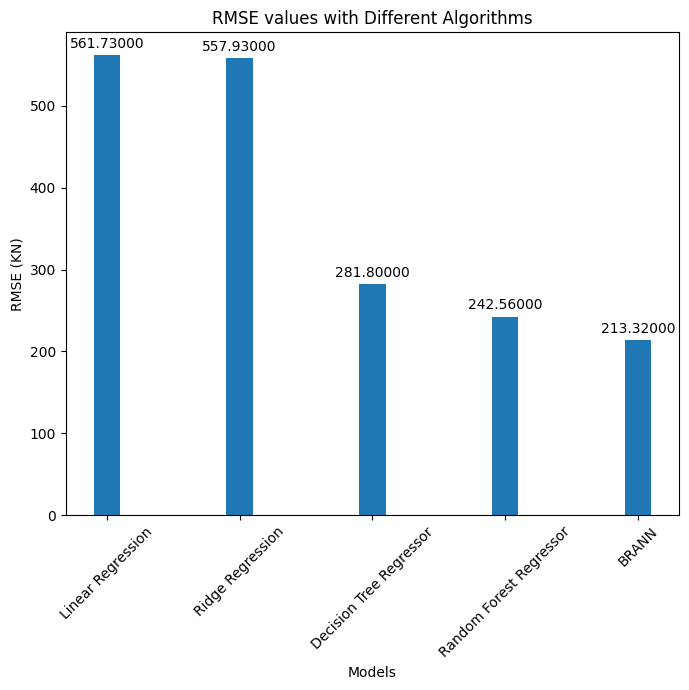

In [42]:
names= ["Linear Regression","Ridge Regression","Decision Tree Regressor","Random Forest Regressor","BRANN"]
x = np.arange(len(names)) 
width = 0.2

j=[561.73,557.93,281.8,242.56,213.32]
fig, ax = plt.subplots(figsize=(7,7))
rects = ax.bar(x,j,width=0.2)
ax.set_ylabel('RMSE (KN)')
ax.set_xlabel('Models')
ax.set_title('RMSE values with Different Algorithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
autolabel(rects)
fig.tight_layout()
plt.show()